In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('story_data_new_feats.csv')

In [3]:
feats_to_keep = ['sent_avg_length', 'unique_words_percent', 'age', 'words_exist_per_cent', 'cat_Age', 'cat_Happy', 'cat_Thriller', 'cat_Friendship', 'cat_East',
       'cat_Inspirational', 'cat_Christian', 'cat_Bedtime', 'cat_Drama',
       'cat_Horror', 'cat_Lesbian', 'cat_High', 'cat_Science', 'cat_American',
       'cat_Speculative', 'cat_Funny', 'cat_Adventure', 'cat_Nonfiction',
       'cat_African', 'cat_Christmas', 'cat_Teens', 'cat_Fantasy',
       'cat_Holiday', 'cat_Western', 'cat_Young', 'cat_Coming', 'cat_Suspense',
       'cat_Romance', 'cat_Urban', 'cat_Latinx', 'cat_Desi', 'cat_Asian',
       'cat_Black', 'cat_Sad', 'cat_Kids', 'cat_People', 'cat_Color',
       'cat_Fiction', 'cat_Contemporary', 'cat_Mystery', 'cat_Adult',
       'cat_Transgender', 'cat_Historical', 'cat_Middle', 'cat_Gay',
       'cat_Indigenous', 'cat_Crime', 'num_cats', 'cat_School', 'cat_Creative', 'emotion_anger', 'emotion_fear',
       'emotion_joy', 'emotion_love', 'emotion_sadness', 'emotion_surprise', 'sentiment_POSITIVE_no_prepro', 'sentiment_NEGATIVE_no_prepro',
       'sentiment_hf_text']

In [4]:
target = ['num_likes']

In [5]:
df[feats_to_keep].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sent_avg_length               18248 non-null  float64
 1   unique_words_percent          18248 non-null  float64
 2   age                           18248 non-null  int64  
 3   words_exist_per_cent          18248 non-null  float64
 4   cat_Age                       18248 non-null  int64  
 5   cat_Happy                     18248 non-null  int64  
 6   cat_Thriller                  18248 non-null  int64  
 7   cat_Friendship                18248 non-null  int64  
 8   cat_East                      18248 non-null  int64  
 9   cat_Inspirational             18248 non-null  int64  
 10  cat_Christian                 18248 non-null  int64  
 11  cat_Bedtime                   18248 non-null  int64  
 12  cat_Drama                     18248 non-null  int64  
 13  c

In [6]:
df.shape

(18248, 87)

In [7]:
df['num_likes'].shape

(18248,)

In [8]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)

la_log = transformer.transform(df[target].values).ravel()

In [9]:
la_log.shape

(18248,)

In [10]:
from sklearn.model_selection import train_test_split

test_size = 20/100

X_train, X_test, y_train, y_test = train_test_split(df[feats_to_keep], la_log, test_size=test_size, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14598, 63), (3650, 63), (14598,), (3650,))

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

X_train.shape, X_test.shape

((14598, 63), (3650, 63))

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

In [14]:
lr.score(X_test, y_test)

0.04968014872085502

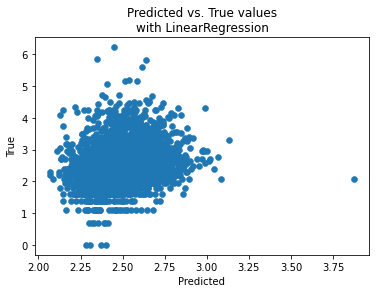

In [15]:
plt.scatter(x=y_pred, y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith LinearRegression')
plt.show()

In [16]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [17]:
y_pred_svr = svr.predict(X_test)

In [18]:
svr.score(X_test, y_test)

0.0106849524053656

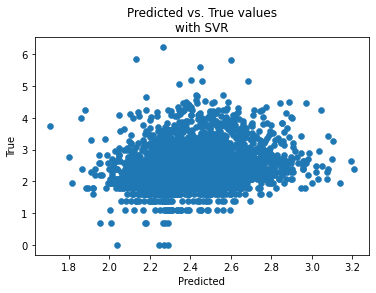

In [19]:
plt.scatter(x=y_pred_svr, y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith SVR')
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [21]:
y_pred_knr = knr.predict(X_test)

In [22]:
knr.score(X_test, y_test)

-0.1635339274039993

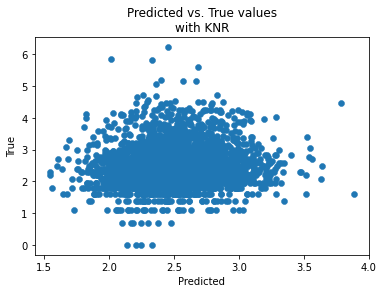

In [23]:
plt.scatter(x=y_pred_knr, y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith KNR')
plt.show()